In [2]:
!pip install pykrige

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.6/979.6 kB 15.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
import pandas as pd
from pykrige.ok import OrdinaryKriging
import numpy as np


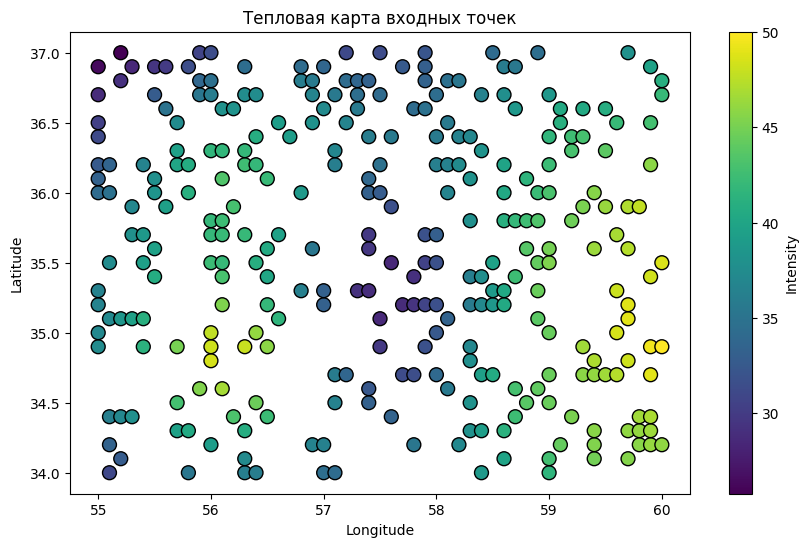

In [47]:

# Загрузка данных
train_data = pd.read_csv('field_train.csv')
example_data = pd.read_csv('field_example.csv')

# Подготовка данных для Kriging
train_lon = train_data['longitude'].values
train_lat = train_data['latitude'].values
train_intensity = train_data['intensity'].values

# Визуализация входных точек (тепловая карта)
plt.figure(figsize=(10, 6))
plt.scatter(train_lon, train_lat, c=train_intensity, cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Тепловая карта входных точек')
plt.show()

In [10]:
train_data

,longitude,latitude,intensity
0,55.0,34.9,37.33
1,55.0,35.0,37.06
2,55.0,35.2,36.64
3,55.0,35.3,36.48
4,55.0,36.0,34.12
...,...,...,...
295,60.0,34.2,45.95
296,60.0,34.9,50.00
297,60.0,35.5,48.67
298,60.0,36.7,41.99


In [18]:
np.linspace(55, 60, 6), np.linspace(34, 37, 4)

# grid_lon = example_data['longitude'].values()
# grid_lat = example_data['latitude'].values()

(array([55., 56., 57., 58., 59., 60.]), array([34., 35., 36., 37.]))

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 32.28216774030134
Full Sill: 32.28216774030265
Range: 3.688220725995394
Nugget: 1.310246746227929e-12 



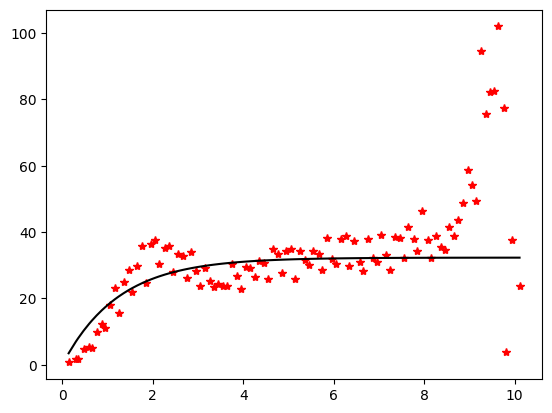

Calculating statistics on variogram model fit...


In [90]:
OK = OrdinaryKriging(
    train_lon,
    train_lat,
    train_intensity,
    variogram_model='exponential',
    anisotropy_scaling = 3,
    verbose=True,
    enable_plotting=True,
    nlags=100,
    coordinates_type  = 'euclidean',
    # variogram_parameters =
    weight = True,
)

In [ ]:

from sklearn.metrics import mean_squared_error

# Создание сетки для интерполяции
grid_lon = np.linspace(55, 60, 60)
grid_lat = np.linspace(34, 37, 40)

# Интерполяция с использованием Kriging
# OK = OrdinaryKriging(train_lon, train_lat, train_intensity, variogram_model='linear')
variogram_models = ['linear', 'power', 'gaussian', 'spherical', 'exponential', 'hole-effect']

# Список для хранения моделей Kriging
OKS = []

# Создание моделей Kriging для каждой вариограммы
for model in variogram_models:
    OK = OrdinaryKriging(train_lon, train_lat, train_intensity, variogram_model=model, weight=True,    anisotropy_scaling = 4)
    OKS.append((model, OK))  # Сохраняем модель и название вариограммы

for OK in OKS:
  intensity_grid, _ = OK[1].execute('grid', grid_lon, grid_lat)

  # Предсказание в точках обучающего набора
  intensity_pred, _ = OK[1].execute('points', train_lon, train_lat)

  # Вычисление MSE
  mse = mean_squared_error(train_intensity, intensity_pred)

  # Визуализация поверхности, созданной Kriging
  plt.figure(figsize=(10, 6))
  plt.contourf(grid_lon, grid_lat, intensity_grid, levels=50, cmap='viridis')
  plt.colorbar(label='Intensity')
  plt.scatter(train_lon, train_lat, c=train_intensity, cmap='viridis', s=100, edgecolor='k')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title(f'Поверхность, созданная Kriging {OK[0]}, MSE: {mse:.4f}')
  plt.legend()
  plt.show()

<ipython-input-95-02f79854bd24>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


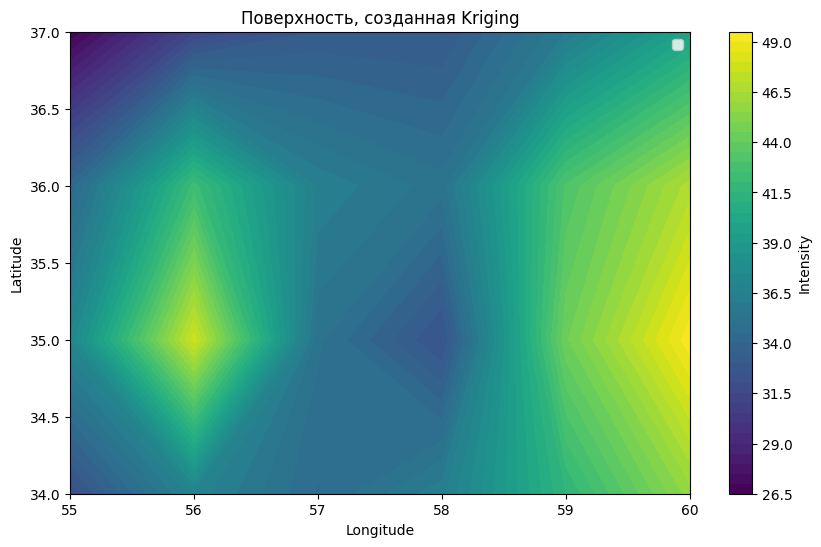

In [95]:
# Создание сетки для интерполяции
grid_lon = np.linspace(55, 60, 6)
grid_lat = np.linspace(34, 37, 4)

# Интерполяция с использованием Kriging
OK = OrdinaryKriging(train_lon, train_lat, train_intensity, variogram_model='linear')
intensity_grid, _ = OK.execute('grid', grid_lon, grid_lat)

# Визуализация поверхности, созданной Kriging
plt.figure(figsize=(10, 6))
plt.contourf(grid_lon, grid_lat, intensity_grid, levels=50, cmap='viridis')
plt.colorbar(label='Intensity')
# plt.scatter(tra/, lat, c='red', s=20, edgecolor='k', label='Исходные точки')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Поверхность, созданная Kriging')
plt.legend()
plt.show()

In [ ]:
#но линейный кригинг решает лучше всего... мда...


In [96]:
# Загрузка тестовых данных
test_data = pd.read_csv('field_example.csv')
test_lon = test_data['longitude'].values
test_lat = test_data['latitude'].values

# Предсказание интенсивности для тестовых точек
intensity_pred, _ = OK.execute('points', test_lon, test_lat)

# Добавление предсказанных значений в DataFrame
test_data['intensity'] = intensity_pred

# Сохранение результатов в новый файл
test_data.to_csv('answers.csv', index=False)
